# Prediction Model_2 - XGBoost Classifier

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv('compiled_cleaned_songs.csv', sep = ',')
df_col = df.columns.values.tolist()
y=['Hot']
x =[i for i in df_col if i not in y]
del x[0:4]
X = df[x] #### Covariates
Y = df[y] #### Dependable variable

In [5]:
###Dummy variables created to handle discrete variables #######
col =['Key','Mode','Time_Signature']
for feat in col:
    col_list='feat'+'_'+ feat
    col_list = pd.get_dummies(X[feat], prefix=feat)
    X1=X.join(col_list)
    X=X1
col =['Key','Mode','Time_Signature']
X_col =X.columns.values.tolist()
final_cols=[i for i in X_col if i not in col]

In [6]:
X1 = X[final_cols]
X2 = X1.drop(columns=['Key_0', 'Mode_0', 'Time_Signature_0']) #### Final dataframe for analysis

###### XGBOOST CLASSIFIER

In [8]:
#### Recursive Feature Elimination ####
from xgboost.sklearn import XGBClassifier
from sklearn.feature_selection import RFE

xgb = XGBClassifier()
rfe = RFE(xgb)
rfe = rfe.fit(X2, Y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True  True  True  True  True
 False False False False False False False  True False  True False False
 False False False False]
[ 1  1  1  1  1  1  1  1  1  1  1  1  3 15 14  5 10 11  4  1  8  1  6  7
  9  2 12 13]


In [9]:
X2_col = X2.columns.values.tolist()

indices = 12,13,14,15,16,17,18,20,22,23,24,25,26,27
X2_col_mod_1 = [i for j, i in enumerate(X2_col) if j not in indices]
X2_mod_1 = X2[X2_col_mod_1]

In [10]:
# split into train and test sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X2_mod_1,Y,test_size=0.2)
print(X_train1.shape)
print(y_train1.shape)
print(X_test1.shape)
print(y_test1.shape)

#fit the model
xgb.fit(X_train1,y_train1.values.ravel())

(8663, 14)
(8663, 1)
(2166, 14)
(2166, 1)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [12]:
cv_scores = cross_val_score(xgb, X_train1, y_train1.values.ravel(), cv=5)
print(cv_scores)
mean_score=cv_scores.mean()
print("Mean:", mean_score)

C:\Users\Varun Bhatia\Anaconda4\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Varun Bhatia\Anaconda4\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Varun Bhatia\Anaconda4\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Varun Bhatia\Anaconda4\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambig

[0.93479515 0.9422966  0.93652626 0.92725173 0.94168591]
Mean: 0.9365111295608012


C:\Users\Varun Bhatia\Anaconda4\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [13]:
y_pred1 = xgb.predict(X_test1)
print('Accuracy of XG Booster classifier on test set: {:.2f}'.format(xgb.score(X_test1, y_test1)))

Accuracy of XG Booster classifier on test set: 0.93


C:\Users\Varun Bhatia\Anaconda4\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Varun Bhatia\Anaconda4\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [15]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix 

print(classification_report(y_test1, y_pred1))
print(confusion_matrix(y_test1, y_pred1))

             precision    recall  f1-score   support

          0       0.95      0.97      0.96      1932
          1       0.72      0.59      0.65       234

avg / total       0.93      0.93      0.93      2166

[[1877   55]
 [  96  138]]


C:\Users\Varun Bhatia\Anaconda4\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


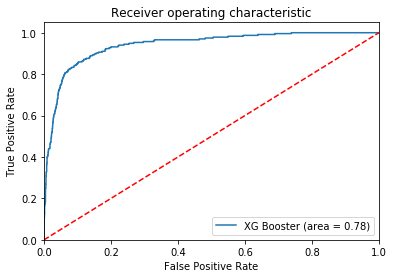

In [16]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
xgb_roc_auc = roc_auc_score(y_test1, xgb.predict(X_test1))
fpr, tpr, thresholds = roc_curve(y_test1, xgb.predict_proba(X_test1)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XG Booster (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")